# Introduction

1. Context
* Industry: Telecommunications
* Key Area: Customer Churn (also known as customer attrition)
* Objective: Understanding why customers leave and predicting which customers are at risk of leaving.
2. Problem Statement <br>
In the competitive telecom industry, retaining existing customers is often more cost-effective than acquiring new ones.<br>
High churn rates can indicate dissatisfaction with service, pricing, or other factors.
Reducing churn can lead to significant cost savings and revenue retention for the company.
3. Goals
* Primary Goal: Develop a machine learning model to predict the likelihood of a customer churning.
* Secondary Goals:
Identify key factors that contribute to customer churn.
Provide actionable insights for reducing churn rates.
4. Analytics Approach
* Data Exploration: Understand the dataset, including feature distribution and missing values.
* Feature Engineering: Create new features that might help in predicting churn.
* Model Selection: Test various classification algorithms (like Logistic Regression, Random Forest, Gradient Boosting, etc.).
* Model Validation: Use techniques like cross-validation to assess model performance.
* Hyperparameter Tuning: Fine-tune the model for optimal performance.
5. Metric Evaluation
* Accuracy: Overall correctness of the model.
* Precision and Recall: Particularly important if the cost of false positives/negatives is high.
* F1 Score: A balance between Precision and Recall.
* AUC-ROC: Measure of the ability of a classifier to distinguish between classes.
* Confusion Matrix: For a detailed understanding of model performance.
6. Project Limitation
* Data Limitations: Quality and quantity of data, presence of biases.
* Model Interpretability: Some models may offer high accuracy but low interpretability.
* Changing Patterns: Customer behavior can change over time, affecting model accuracy.
* Implementation Challenges: Integrating the model into existing systems.

###
| Column Name       | Type    | Description                                         |
|-------------------|---------|-----------------------------------------------------|
| Dependents        | Object  | Indicates whether the customer has dependents ('Yes' or 'No'). |
| Tenure            | Integer | Number of months the customer has been with the company. |
| OnlineSecurity    | Object  | Whether the customer uses Online Security service ('Yes', 'No', 'No internet service'). |
| OnlineBackup      | Object  | Whether the customer uses Online Backup service ('Yes', 'No', 'No internet service'). |
| InternetService   | Object  | Type of internet service (DSL, Fiber optic, or No). |
| DeviceProtection  | Object  | Whether the customer has Device Protection service ('Yes', 'No', 'No internet service'). |
| TechSupport       | Object  | Whether the customer uses Tech Support services ('Yes', 'No', 'No internet service'). |
| Contract          | Object  | Contract term of the customer (Month-to-month, One year, Two year). |
| PaperlessBilling  | Object  | Whether the customer has paperless billing ('Yes' or 'No'). |
| MonthlyCharges    | Float   | Amount charged to the customer each month. |
| Churn             | Object  | Whether the customer has left within the last month ('Yes' or 'No'). |


# Data Understanding

In [518]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pycaret.classification import *
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline





# Load the dataset
df = pd.read_csv('data_telco_customer_churn.csv')

# Display basic information about the dataset
df


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [520]:
# Count the number of 'Churn'
print(df['Churn'].value_counts())

# Calculate the percentage of churn
print(df['Churn'].value_counts() / len(df))


Churn
No     3614
Yes    1316
Name: count, dtype: int64
Churn
No     0.733063
Yes    0.266937
Name: count, dtype: float64


In [521]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


Columns and Their Business Context<br>
* Dependents: Whether the customer has dependents (Yes/No). This can affect customer loyalty and churn, as those with dependents may have different priorities or financial considerations.
* Tenure: Duration (in months) a customer has been with the company. Longer tenure might indicate higher loyalty.
* OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: Services subscribed by the customer (Yes/No/No internet service). These value-added services can impact customer satisfaction and retention.
* InternetService: Type of internet service (DSL, Fiber optic, No). Different types of services can affect customer experience and churn.
* Contract: Type of customer contract (Month-to-month, One year, Two year). Longer contracts might indicate a lower likelihood of churn.
* PaperlessBilling: Whether the customer uses paperless billing (Yes/No). This could correlate with customer’s tech-savviness or environmental consciousness.
* MonthlyCharges: The amount charged to the customer monthly. Higher charges might lead to higher churn.
* Churn: Customer churn status (Yes/No). This is the target variable for prediction.

In [522]:
# Filtering out numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Generating descriptive statistics
descriptive_statistics = numerical_data.describe()
descriptive_statistics

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [523]:
from sklearn.model_selection import train_test_split
# split seen unseen
data, dataunseen = train_test_split(df, test_size=0.2, random_state=42)

In [524]:
data.shape

(3944, 11)

In [525]:
dataunseen.shape

(986, 11)

# EDA - Exploratory Data Analysis

In [526]:
# mengambil nama kolom kategorikal
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
cat_features

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'Churn']

In [527]:
pd.DataFrame({
    'feature'           : data.columns.values,
    'data_type'         : data.dtypes.values,
    'null_value(%)'     : data.isna().mean().values * 100,
    'n_unique'          : data.nunique().values,
    'duplicate'         : data.duplicated().sum(),
    'Negative_value_num': [len(data[col][data[col] < 0])/ len(data) * 100 if col in data.select_dtypes(include=np.number).columns else 0 for col in data.columns],
    'Zero_value_num'    : [len(data[col][data[col] == 0])/ len(data) * 100 if col in data.select_dtypes(include=np.number).columns else 0 for col in data.columns],
    'Zero_value_obj'    : [len(data[col][data[col] == ''])/ len(data) * 100 if col in data.select_dtypes(include=np.object_).columns else 0 for col in data.columns],
    'sample_unique'     : [data[col].unique() for col in data.columns]}
).round(3)

,feature,data_type,null_value(%),n_unique,duplicate,Negative_value_num,Zero_value_num,Zero_value_obj,sample_unique
0,Dependents,object,0.0,2,55,0.0,0.000,0.0,"[No, Yes]"
1,tenure,int64,0.0,73,55,0.0,0.177,0.0,"[13, 44, 15, 43, 30, 22, 48, 64, 3, 20, 71, 34..."
2,OnlineSecurity,object,0.0,3,55,0.0,0.000,0.0,"[Yes, No internet service, No]"
3,OnlineBackup,object,0.0,3,55,0.0,0.000,0.0,"[No, No internet service, Yes]"
4,InternetService,object,0.0,3,55,0.0,0.000,0.0,"[DSL, No, Fiber optic]"
5,DeviceProtection,object,0.0,3,55,0.0,0.000,0.0,"[No, No internet service, Yes]"
6,TechSupport,object,0.0,3,55,0.0,0.000,0.0,"[Yes, No internet service, No]"
7,Contract,object,0.0,3,55,0.0,0.000,0.0,"[One year, Month-to-month, Two year]"
8,PaperlessBilling,object,0.0,2,55,0.0,0.000,0.0,"[No, Yes]"
9,MonthlyCharges,float64,0.0,1313,55,0.0,0.000,0.0,"[55.15, 20.5, 51.1, 94.3, 100.45, 100.65, 108...."


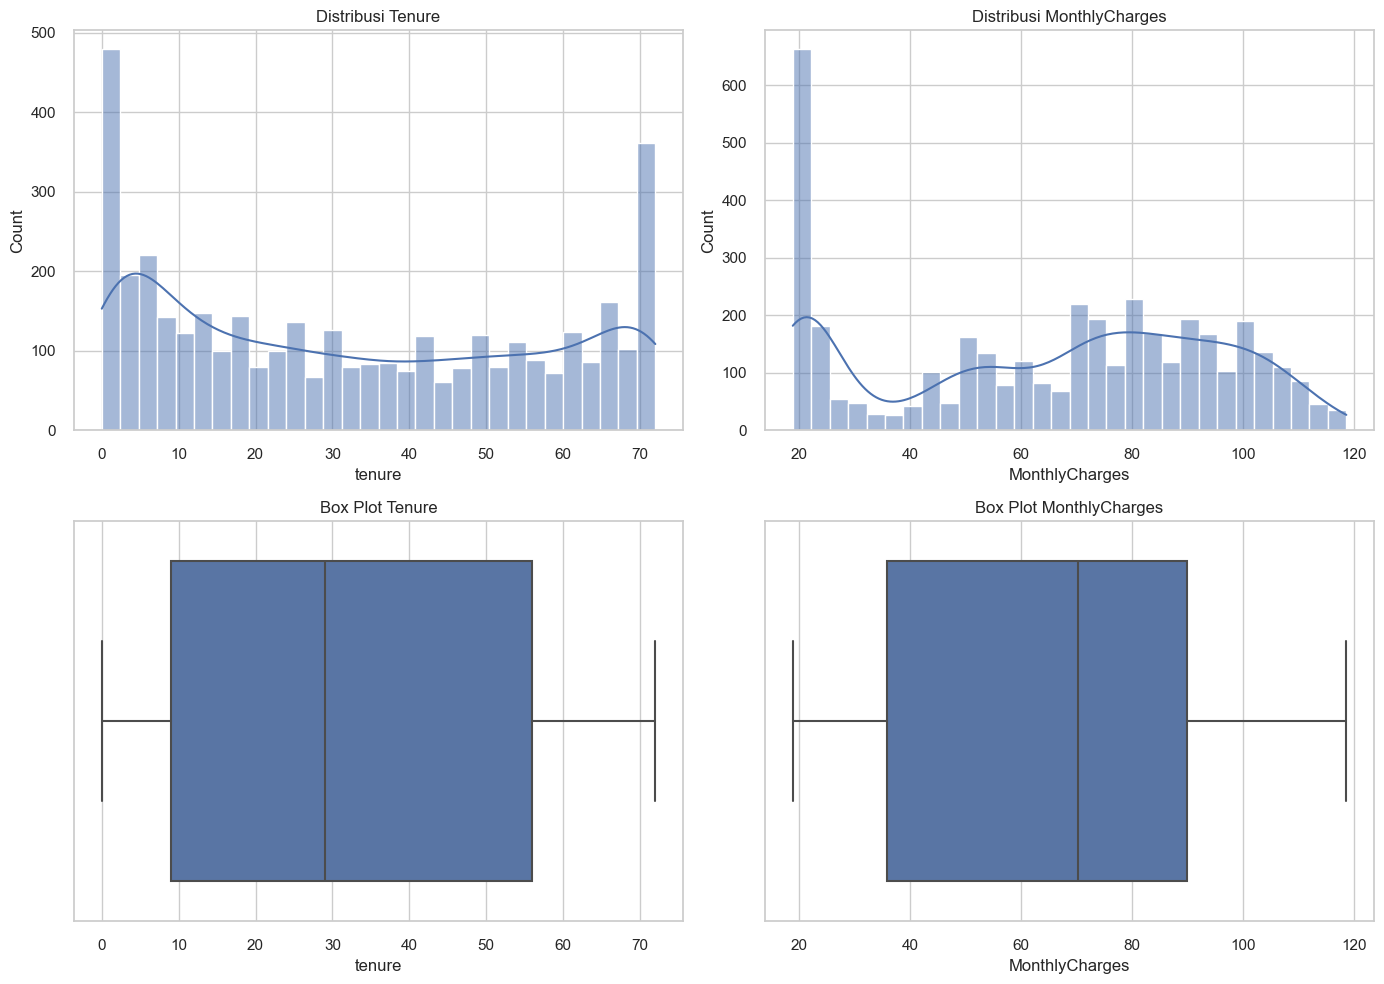

In [528]:
# Mengatur gaya plot
sns.set(style="whitegrid")

# Membuat histogram dan box plot untuk variabel numerik
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Histogram untuk 'Tenure'
sns.histplot(data['tenure'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribusi Tenure')

# Box plot untuk 'Tenure'
sns.boxplot(x=data['tenure'], ax=ax[1, 0])
ax[1, 0].set_title('Box Plot Tenure')

# Histogram untuk 'MonthlyCharges'
sns.histplot(data['MonthlyCharges'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribusi MonthlyCharges')

# Box plot untuk 'MonthlyCharges'
sns.boxplot(x=data['MonthlyCharges'], ax=ax[1, 1])
ax[1, 1].set_title('Box Plot MonthlyCharges')

plt.tight_layout()
plt.show()


### Numerical Variables: 'Tenure' and 'MonthlyCharges'
* Tenure (Duration of Subscription)

The histogram shows a fairly uniform distribution across the tenure range, with peaks at the beginning (new customers) and at the end (long-term customers).<br>
The box plot indicates that the median tenure is around the middle of the range, without significant outliers.<br>
* MonthlyCharges (Monthly Fees)

The histogram shows a more varied distribution. There is a concentration of customers with lower monthly fees and another peak at higher fees, indicating different groups of customers with different service packages.<br>
The box plot shows a slightly higher median, and there are no clear outliers.

In [529]:
# Numerical Features
num_feature = [feature for feature in df.describe().columns]
num_feature

['tenure', 'MonthlyCharges']

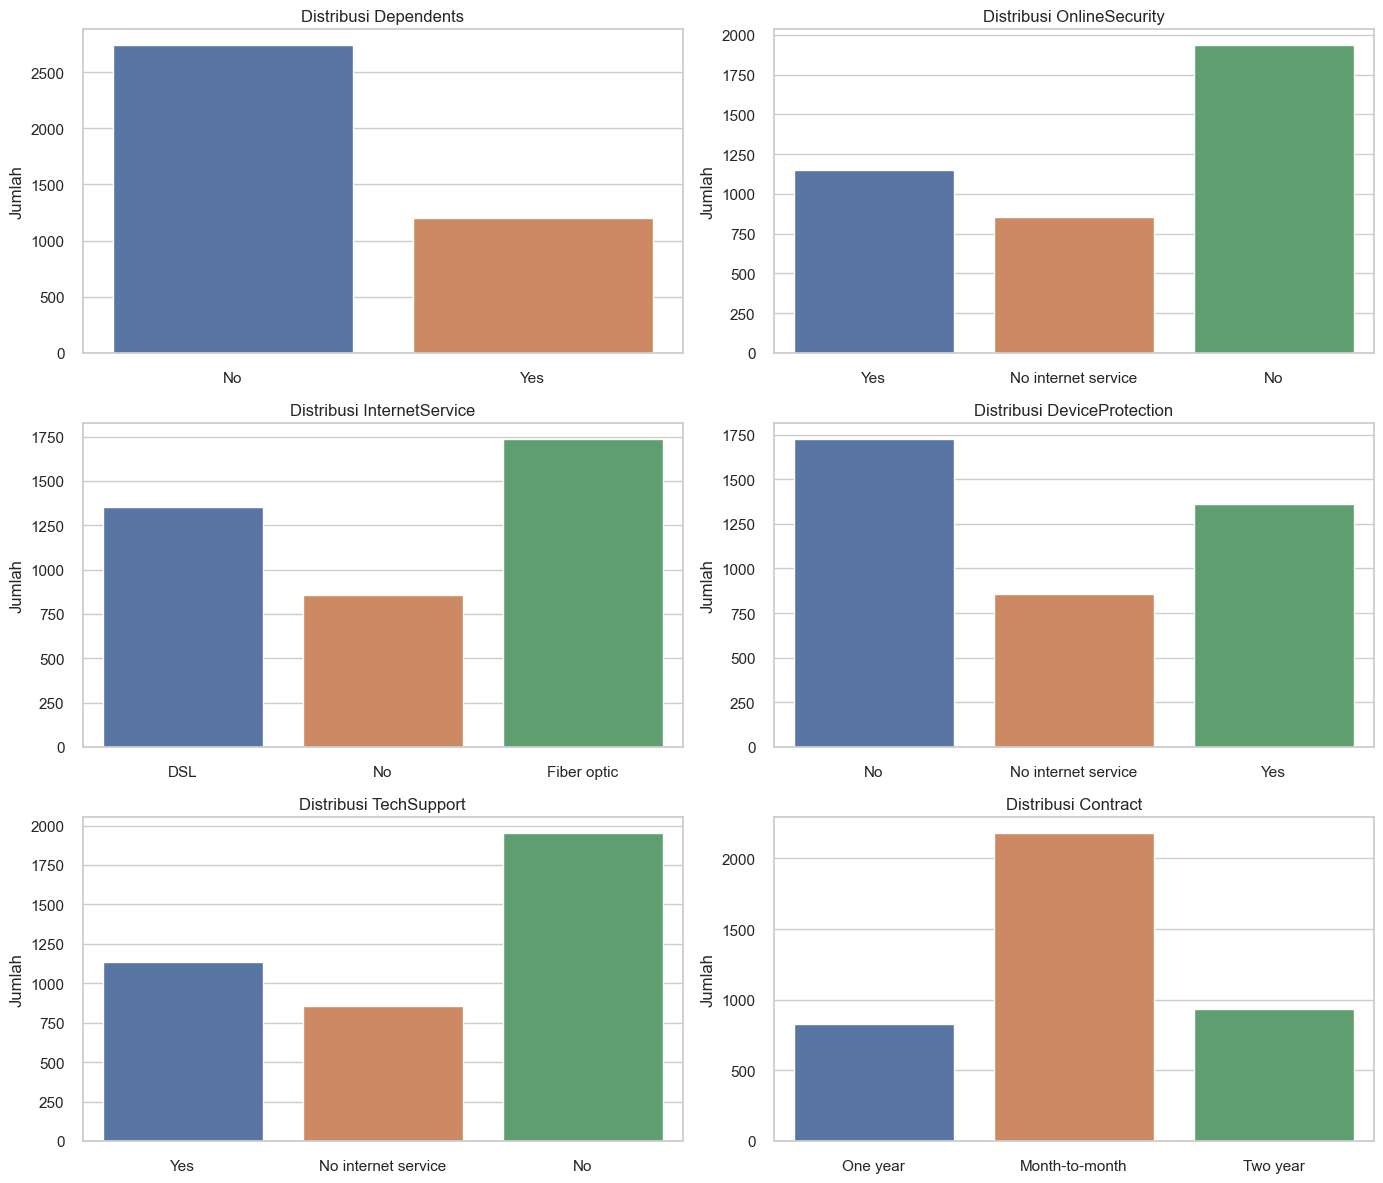

In [530]:
# Membuat count plot untuk beberapa variabel kategorikal
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

# Variabel kategorikal untuk diplot
categorical_vars = ['Dependents', 'OnlineSecurity', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract']

for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=data, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Distribusi {var}')
    ax[i//2, i%2].set_xlabel('')
    ax[i//2, i%2].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

### Categorical Variables: 'Dependents', 'OnlineSecurity', 'InternetService', and others
* Dependents: There are more customers without dependents than with dependents.
* OnlineSecurity: Most customers either do not have online security services or do not have internet service. Only a small proportion have online security services.
* InternetService: A large number of customers use Fiber optic services, followed by DSL. There's also a significant number of customers without internet service.
* DeviceProtection: The distribution is similar to OnlineSecurity, where most customers either do not have device protection or do not have internet service.
* TechSupport: Most customers do not have technical support, with a smaller number having this service.
* Contract: The majority of customers are in month-to-month contracts, with fewer in one-year or two-year contracts.

In [531]:
# mengambil nama kolom kategorikal
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
cat_features

['Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'InternetService',
 'DeviceProtection',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'Churn']

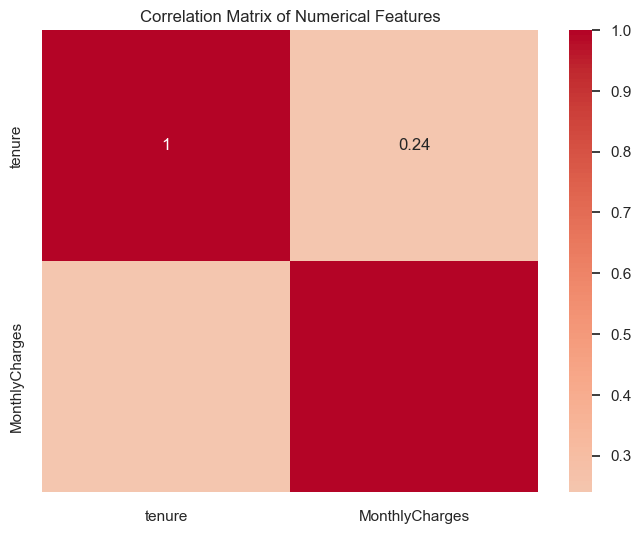

,tenure,MonthlyCharges
tenure,1.000000,0.240244
MonthlyCharges,0.240244,1.000000


In [532]:
# Menghitung korelasi antar variabel numerik
correlation_matrix = numerical_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

correlation_matrix


The correlation coefficient between 'Tenure' and 'MonthlyCharges' is relatively low, indicating that there is not a strong linear relationship between these two variables. This suggests that the duration of a customer's subscription (tenure) does not necessarily predict the amount they are charged each month.

# <strong> Data Preparation

## Missing Value

In [533]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values if any
missing_values[missing_values > 0]

Series([], dtype: int64)

Overall, the lack of missing values is a positive indicator of the dataset's quality and simplifies the process of data analysis and subsequent machine learning.

## Duplicated Data

In [534]:
# Check for duplicated rows
duplicated_data = data.duplicated().sum()
duplicated_data

55

Since there are 55 duplicated values, we will drop all of the duplicated values.

In [535]:
data_cleaned = data.drop_duplicates(keep='first')
data_cleaned.duplicated().sum()

0

In [536]:
data_cleaned.shape

(3889, 11)

## Outliers

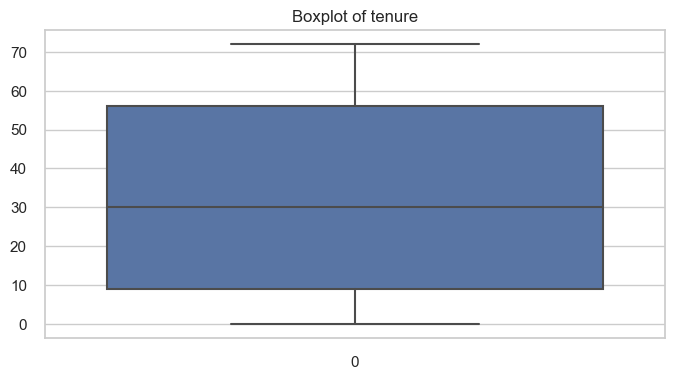

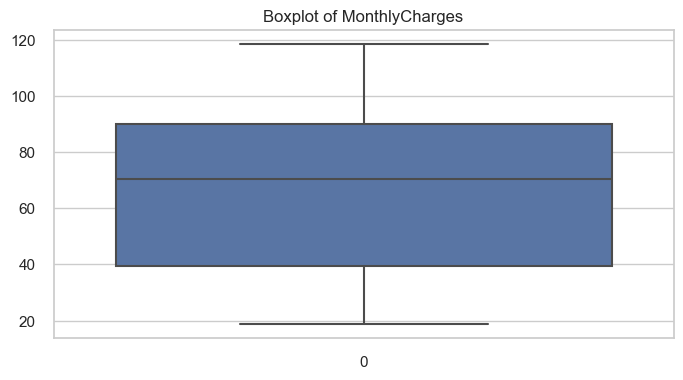

In [537]:
for feature in ['tenure', 'MonthlyCharges']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data_cleaned[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [538]:
# Function to detect outliers using IQR
def detect_outliers(data_cleaned, features):
    outlier_indices = []

    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Determine outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = data_cleaned[(data_cleaned[col] < Q1 - outlier_step) | (data_cleaned[col] > Q3 + outlier_step)].index

        # Append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # Select observations containing more than one outlier
    outlier_indices = list(set(outlier_indices))
    return outlier_indices

# Checking for outliers in the numerical columns
outlier_indices = detect_outliers(data_cleaned, num_feature)

# Insights from the outliers
outlier_insights = {
    "Number of Outliers": len(outlier_indices),
    "Percentage of Outliers": (len(outlier_indices) / len(data_cleaned)) * 100,
    "Outliers Impact": "May skew the results" if len(outlier_indices) > 0 else "No significant impact from outliers"
}

outlier_insights



{'Number of Outliers': 0,
 'Percentage of Outliers': 0.0,
 'Outliers Impact': 'No significant impact from outliers'}

Since there are no outliers, there is no significant impact from outliers on the dataset. This means the data is relatively uniform and does not contain extreme values that could skew analysis results.

## Cardinality

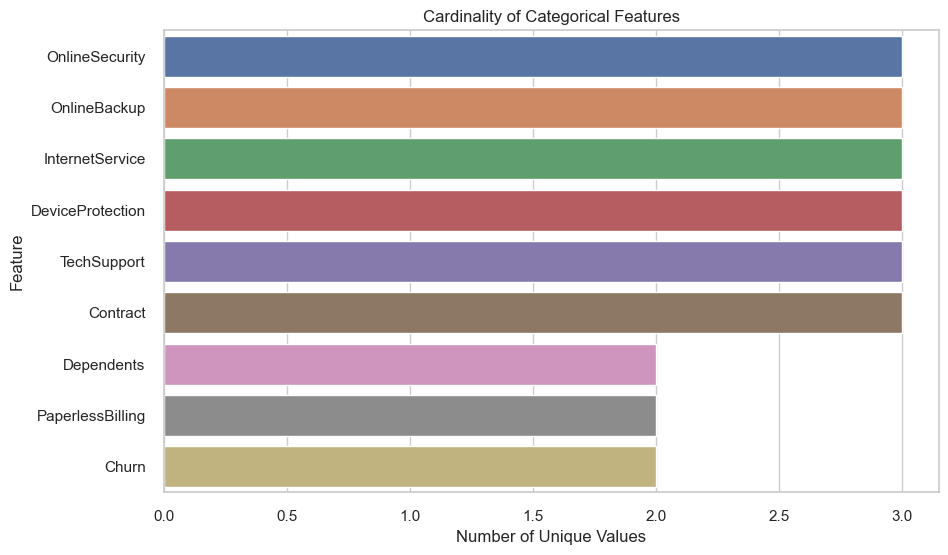

,Feature,Cardinality
1,OnlineSecurity,3
2,OnlineBackup,3
3,InternetService,3
4,DeviceProtection,3
5,TechSupport,3
6,Contract,3
0,Dependents,2
7,PaperlessBilling,2
8,Churn,2


In [539]:
# Calculating the cardinality (number of unique values) for each categorical feature
cardinality = {col: data_cleaned[col].nunique() for col in data_cleaned.columns if data_cleaned[col].dtype == 'object'}

# Converting the cardinality dictionary to a DataFrame for visualization
cardinality_df = pd.DataFrame(list(cardinality.items()), columns=['Feature', 'Cardinality']).sort_values(by='Cardinality', ascending=False)

# Visualizing the cardinality
plt.figure(figsize=(10, 6))
sns.barplot(x='Cardinality', y='Feature', data=cardinality_df)
plt.title('Cardinality of Categorical Features')
plt.xlabel('Number of Unique Values')
plt.ylabel('Feature')
plt.show()

cardinality_df

* This low level of cardinality is beneficial for modeling because it does not add unnecessary complexity. Features with few unique categories are easier to encode and interpret in the model.
* There are no categorical features with very high cardinality, so there is no need for special cardinality reduction techniques such as binning or grouping.
* Dengan kardinalitas yang relatif rendah, teknik encoding standar seperti one-hot encoding atau label encoding dapat digunakan secara efektif tanpa khawatir meningkatkan dimensi fitur secara signifikan.
* Overall, the low cardinality of these features suggests that this dataset is clean enough for analysis and modeling, without requiring the special handling associated with high cardinality. This facilitates the modeling process and interpretation of the results.

# Rare Labels

In [540]:
import tabulate 

# Identifying categorical columns from 'data_cleaned'
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns.tolist()

# Calculating frequency distribution for each categorical variable in percentage
label_frequency_percent = {col: data_cleaned[col].value_counts(normalize=True) * 100 for col in categorical_columns}

# Creating a nested list for use with tabulate
data_for_tabulate = []

# Filling data for tabulate
for variable, freq_series in label_frequency_percent.items():
    data_for_tabulate.append([variable, freq_series.index[0], f"{freq_series.iloc[0]:.2f}%"])
    for idx in range(1, len(freq_series)):
        data_for_tabulate.append(["", freq_series.index[idx], f"{freq_series.iloc[idx]:.2f}%"])

# Displaying frequency distribution in percentage using tabulate
tabulate_data = tabulate.tabulate(data_for_tabulate, headers=["Variable", "Category", "Frequency (%)"], tablefmt="pipe")
print(tabulate_data)


| Variable         | Category            | Frequency (%)   |
|:-----------------|:--------------------|:----------------|
| Dependents       | No                  | 69.30%          |
|                  | Yes                 | 30.70%          |
| OnlineSecurity   | No                  | 49.32%          |
|                  | Yes                 | 29.52%          |
|                  | No internet service | 21.16%          |
| OnlineBackup     | No                  | 44.00%          |
|                  | Yes                 | 34.84%          |
|                  | No internet service | 21.16%          |
| InternetService  | Fiber optic         | 44.28%          |
|                  | DSL                 | 34.56%          |
|                  | No                  | 21.16%          |
| DeviceProtection | No                  | 43.89%          |
|                  | Yes                 | 34.94%          |
|                  | No internet service | 21.16%          |
| TechSupport      | No 

- Dependents:

    - A significant majority (69.30%) of the entries do not have dependents. This could imply a customer base that is predominantly single or without children.
- Online Security, Online Backup, Device Protection, Tech Support:

    - These features have a similar distribution pattern, with the highest percentage of customers not having these services (ranging from 43.89% to 49.73%).
    - A notable portion of the customers (approximately 21.16%) do not have internet service, which implies they don't need these additional services.
- Internet Service:

    - 'Fiber optic' is the most common internet service (44.28%), followed closely by 'DSL' (34.56%).
    - About 21.16% of the customers do not have an internet service, which aligns with the observations in other services like online security, backup, etc.
- Contract:

    - The 'Month-to-month' contract is the most common (55.03%), indicating a preference or flexibility for shorter commitment periods among customers.
    - Longer contracts ('Two year' and 'One year') are less common, suggesting customers may be hesitant to commit to long-term agreements.
- Paperless Billing:

    - A significant majority of customers (60.04%) prefer paperless billing, which could reflect a trend towards digital and environmentally friendly options.
- Churn:

    - The churn rate in the dataset is 25.87%. This is a critical metric for any business, as it reflects the proportion of customers who have discontinued their service.

## Collinearity

In [541]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    # Select only columns that are numeric
    features = data_cleaned[num_feature]

    # Calculate VIF for each variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = features.columns
    vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

    return vif_data

vif_result = calculate_vif(data)
print(vif_result)


         Variable       VIF
0          tenure  2.646119
1  MonthlyCharges  2.646119


VIF Values: Both tenure and MonthlyCharges have VIF values of about 2.65. This is well below the common thresholds of 5 or 10, which are often used as benchmarks to indicate significant multicollinearity. A VIF value less than 5 suggests that these variables do not have serious multicollinearity issues.

* Low Multicollinearity: The low VIF values mean that tenure and MonthlyCharges are not highly linearly dependent on other explanatory variables in your model. This is a positive sign for regression models, as it implies that each of these variables provides unique information that isn't redundantly captured by the others.
* Model Stability: Models built with features having low multicollinearity are generally more stable. Changes in the dataset or in model specifications are less likely to significantly alter the relationships between these variables.



## Splitting Data

In [542]:
# Splitting the dataset into 'seen' and 'unseen' sets
#seen, unseen = train_test_split(data, test_size=0.2, random_state=42)

## Feature Engineering

### Encoding

In [543]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
# from sklearn.compose import ColumnTransformer

# # Define your columns
# numerical_cols = ['tenure', 'MonthlyCharges']
# categorical_cols = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'Churn']
# ordinal_cols = ['InternetService', 'Contract']

# # Manually map the 'InternetService' and 'Contract' columns
# internet_service_mapping = {None: 0, 'Fiber optic': 3, 'DSL': 2, 'No': 1}
# contract_mapping = {None: 0, 'Month-to-month': 3, 'One year': 2, 'Two year': 1}
# data['InternetService'] = data['InternetService'].map(internet_service_mapping)
# data['Contract'] = data['Contract'].map(contract_mapping)

# # Create the transformers for each type of column
# numerical_transformer = StandardScaler()
# categorical_transformer = OneHotEncoder()
# ordinal_transformer = OrdinalEncoder()

# # Create the column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols),
#         ('ord', ordinal_transformer, ordinal_cols)
#     ]
# )

# # Apply the transformations
# data_transformed = preprocessor.fit_transform(data)

In [544]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline  # Import ImbPipeline if using imbalanced-learn

# Load your data
# data = pd.read_csv('your_data.csv')  # Replace with your actual data loading code

# Define your columns
numerical_cols = ['tenure', 'MonthlyCharges']
categorical_cols = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']
ordinal_cols = ['InternetService', 'Contract']

# Manually map the 'InternetService' and 'Contract' columns
internet_service_mapping = {'Fiber optic': 3, 'DSL': 2, 'No': 1}
contract_mapping = {'Month-to-month': 3, 'One year': 2, 'Two year': 1}
data['InternetService'] = data['InternetService'].map(internet_service_mapping)
data['Contract'] = data['Contract'].map(contract_mapping)

# Create the transformers for each type of column
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
ordinal_transformer = OrdinalEncoder()

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('ord', ordinal_transformer, ordinal_cols)
        
    ],
    remainder='passthrough')

# Encode the target variable 'Churn'
label_encoder = LabelEncoder()
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Create and fit the pipeline
pipeline = ImbPipeline(steps=[('preprocessor', preprocessor)])
pipeline.fit(X, y)  # Use X and y directly


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['tenure', 'MonthlyCharges']),
                                                 ('cat',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',...
                                                                sparse_output=True),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport',
                                                   'PaperlessBilling']),
                                                 ('ord',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>,
                                                                 encoded_missing_value=nan,
                                                                 handle_unknown='error',
                                                                 unknown_value=None),
                                                  ['InternetService',
                                                   'Contract'])],
                                   verbose=False,
                                   verbose_feature_names_out=True))],
         verbose=False)

In [545]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming 'data' is your DataFrame

# # Encode the 'Churn' column
# label_encoder = LabelEncoder()
# data['Churn'] = label_encoder.fit_transform(data['Churn'])

# # Separate features and target
# X = data.drop('Churn', axis=1)
# y = data['Churn']

# # Continue with your existing pipeline for features
# # Fit the pipeline with features only
# pipeline.fit(X, y)

# # Now, your pipeline is ready for feature preprocessing, and 'y' contains the encoded target


### Scaling

In [546]:


# Menentukan kolom numerik untuk scaling
numerical_columns = ['tenure', 'MonthlyCharges']  # Contoh, sesuaikan dengan kolom numerik Anda

# Melakukan Standard Scaling
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Menampilkan beberapa baris pertama setelah scaling
data.head()


,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
3541,No,-0.797044,Yes,No,2,No,Yes,2,No,-0.324266,0
1075,Yes,0.465979,No internet service,No internet service,1,No internet service,No internet service,2,Yes,-1.477108,0
309,No,-0.715559,No,No,2,No,No,3,Yes,-0.459013,0
4271,No,0.425236,No,Yes,3,No,Yes,3,Yes,0.978297,0
4821,No,-0.104419,No,No,3,Yes,No,3,No,1.182914,0


In the machine learning process, scaling the features 'tenure' and 'MonthlyCharges' using StandardScaler ensures that both features have a mean of zero and a variance of one, thus avoiding the dominance of one feature due to scale differences and improving model performance, especially in algorithms that rely on distance or gradient calculations

## Imbalance Data

In [547]:
# Calculate the proportions of each value in the 'Churn' column
churn_proportions = data['Churn'].value_counts() / len(data['Churn'])
churn_proportions

Churn
0    0.740112
1    0.259888
Name: count, dtype: float64

Based on the calculation results, the proportion of customers in the dataset who have stopped subscribing (Churn = 'Yes') is around 26%, while the proportion of customers who remain (Churn = 'No') is around 73%.

In [548]:
data.columns

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

## Data Spliting

In [549]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Assuming data_encoded is your dataset
seen, unseen = train_test_split(df, test_size=0.2, random_state=42)


In [550]:
# Preparing the features (X) and target (y) for the 'seen' data
X_seen = seen.drop('Churn', axis=1)
y_seen = seen['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Encoding target variable as binary

# Applying SMOTE to the training data
#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_seen, y_seen)

# Further splitting the 'seen' data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_seen, y_seen, test_size=0.3, random_state=42)

# Checking the dimensions of the datasets
#X_train.shape, X_test.shape, unseen.shape


## Pipeline

In [551]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from imblearn.pipeline import Pipeline as ImbPipeline  # Assuming ImbPipeline is from imbalanced-learn

# # Assuming 'data' is your DataFrame
# # Apply the manual mapping for 'InternetService' and 'Contract'
# data['InternetService'] = data['InternetService'].map(internet_service_mapping)
# data['Contract'] = data['Contract'].map(contract_mapping)

# # Define the columns
# numerical_cols = ['tenure', 'MonthlyCharges']
# categorical_cols = ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']
# ordinal_cols = ['InternetService', 'Contract']  # These are already manually encoded

# # Create the transformers
# numerical_transformer = StandardScaler()
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# # Create the column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols),
#         ('ord', ordinal_transformer, ordinal_cols)
#     ],
#     remainder='passthrough')

# # Create the pipeline
# pipeline = ImbPipeline(steps=[('preprocessor', preprocessor)])

# # Fit the pipeline (assuming X_seen and y_seen are your features and target)
# pipeline.fit(X_seen, y_seen)

# # The pipeline is now set up with the correct encodings


In [552]:
# numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = data.select_dtypes(include=['object']).drop(['Churn'], axis=1).columns

# numerical_transformer = StandardScaler()
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ],
# remainder='passthrough')

# pipeline = ImbPipeline(steps=[('preprocessor', preprocessor)
#                               ])

# pipeline.fit(X_seen, y_seen)
# pipeline


# Modeling Experiments

In [553]:
from pycaret.classification import *

clf1 = setup(data=data_cleaned, target='Churn', preprocess=False, custom_pipeline=pipeline, session_id=123, fix_imbalance=True
)


,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3889, 11)"
4,Transformed data shape,"(3889, 21)"
5,Transformed train set shape,"(2722, 21)"
6,Transformed test set shape,"(1167, 21)"
7,Numeric features,2
8,Categorical features,8


- Targeted Preprocessing: Your choice to use a custom pipeline suggests a targeted approach to preprocessing. It's crucial that the preprocessing steps align well with the nature of your data.
- Class Imbalance Management: Since class imbalance is being addressed, the model's performance metrics should be more reliable, especially for the minority class (presumably the 'Churn' class).
- Feature Engineering Impact: The increase in features post-transformation implies significant feature engineering. It's important to ensure that these transformations are meaningful and improve model performance.
- Model Complexity: With more features post-transformation, models might become more complex. This could potentially increase the risk of overfitting, which needs to be monitored.

## Benchmarking Model

### 3 best model with resampling

In [554]:
best_model = compare_models(n_select=3)
print(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:07:20
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7976,0.8416,0.7976,0.7875,0.7899,0.4364,0.4412,0.6790
ridge,Ridge Classifier,0.7957,0.0000,0.7957,0.7820,0.7823,0.4079,0.4195,0.0170
ada,Ada Boost Classifier,0.7957,0.8378,0.7957,0.7863,0.7887,0.4346,0.4387,0.0520
lda,Linear Discriminant Analysis,0.7946,0.8389,0.7946,0.7854,0.7880,0.4332,0.4368,0.0190
gbc,Gradient Boosting Classifier,0.7935,0.8381,0.7935,0.7818,0.7844,0.4194,0.4251,0.0610
svm,SVM - Linear Kernel,0.7755,0.0000,0.7755,0.7902,0.7715,0.4153,0.4322,0.0180
lightgbm,Light Gradient Boosting Machine,0.7748,0.8169,0.7748,0.7649,0.7683,0.3821,0.3845,0.1190
knn,K Neighbors Classifier,0.7704,0.7752,0.7704,0.7602,0.7635,0.3687,0.3716,0.2870
rf,Random Forest Classifier,0.7575,0.7857,0.7575,0.7428,0.7469,0.3193,0.3243,0.1000
dummy,Dummy Classifier,0.7414,0.5000,0.7414,0.5496,0.6313,0.0000,0.0000,0.0170


[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001), AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)]


- Logistic Regression (lr):

    - Akurasi Tinggi (0.7976): Menunjukkan kinerja yang baik dalam mengklasifikasikan data secara benar.
    - AUC yang Kuat (0.8416): AUC yang tinggi menunjukkan bahwa model ini memiliki kemampuan yang baik dalam membedakan antara kelas.
    - Kappa dan MCC yang Baik: Skor Kappa (0.4364) dan MCC (0.4412) yang tinggi menunjukkan bahwa model ini memiliki kinerja yang baik di luar kesempatan acak, terutama dalam konteks dataset yang mungkin tidak seimbang.
    - Waktu Pelatihan (TT): 0.6130 detik yang relatif singkat menunjukkan efisiensi dalam pemrosesan.
- Ridge Classifier (ridge):

    - Akurasi Hampir Sama dengan Logistic Regression (0.7957): Ini menunjukkan keandalan dalam mengklasifikasikan.
    - Waktu Pelatihan Sangat Cepat (0.0190 detik): Sangat cocok untuk skenario di mana kecepatan pelatihan adalah pertimbangan penting.
    - Kappa dan MCC yang Kompetitif: Meskipun sedikit lebih rendah dari Logistic Regression, tetap menunjukkan kemampuan yang baik dalam klasifikasi.
- Ada Boost Classifier (ada):

    - Akurasi yang Kompetitif (0.7957): Mirip dengan Ridge Classifier, menunjukkan efektivitas yang baik dalam klasifikasi.
    - AUC yang Kuat (0.8378): Menunjukkan kemampuan yang baik dalam membedakan antar kelas.
    - Waktu Pelatihan yang Efisien (0.0550 detik): Lebih lambat dari Ridge tapi masih efisien.
    - Kappa dan MCC yang Baik: Menunjukkan kinerja yang baik di luar kesempatan acak.

Secara umum, ketiga model ini menawarkan kombinasi kinerja yang baik dalam hal akurasi, kemampuan diskriminatif (AUC), dan efisiensi waktu pelatihan. Mereka mungkin memberikan keseimbangan yang baik antara keandalan dan efisiensi komputasi, yang penting dalam banyak aplikasi praktis machine learning.

### Creating Model

In [555]:
# Logistic Regression (lr)
# Ridge Classifier (ridge)
# Ada Boost Classifier (ada)
best_model1 = create_model(best_model[0])
best_model2 = create_model(best_model[1])
best_model3 = create_model(best_model[2])


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.8557,0.8095,0.7984,0.7984,0.4553,0.4657
1,0.8242,0.8601,0.8242,0.8157,0.8164,0.5071,0.5141
2,0.8015,0.8264,0.8015,0.7899,0.7913,0.4394,0.4473
3,0.7721,0.8322,0.7721,0.7595,0.7634,0.3689,0.3727
4,0.8088,0.8633,0.8088,0.8026,0.8049,0.4805,0.4820
5,0.8088,0.8496,0.8088,0.8013,0.8038,0.4754,0.4778
6,0.7868,0.8368,0.7868,0.7780,0.7811,0.4148,0.4170
7,0.7831,0.8336,0.7831,0.7718,0.7754,0.3959,0.3994
8,0.8015,0.8507,0.8015,0.7912,0.7938,0.4443,0.4490


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8059,0.0000,0.8059,0.7944,0.7952,0.4476,0.4567
1,0.7949,0.0000,0.7949,0.7803,0.7781,0.3952,0.4118
2,0.7978,0.0000,0.7978,0.7841,0.7804,0.4024,0.4209
3,0.7831,0.0000,0.7831,0.7677,0.7696,0.3783,0.3879
4,0.7941,0.0000,0.7941,0.7790,0.7786,0.3934,0.4074
5,0.8088,0.0000,0.8088,0.7984,0.8001,0.4595,0.4660
6,0.7868,0.0000,0.7868,0.7727,0.7756,0.3910,0.3982
7,0.7868,0.0000,0.7868,0.7727,0.7756,0.3910,0.3982
8,0.8199,0.0000,0.8199,0.8099,0.8084,0.4775,0.4899


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8059,0.8519,0.8059,0.8003,0.8025,0.4789,0.4801
1,0.7949,0.8546,0.7949,0.7832,0.7858,0.4250,0.4309
2,0.7941,0.8250,0.7941,0.7825,0.7850,0.4244,0.4302
3,0.7794,0.8164,0.7794,0.7689,0.7724,0.3952,0.3981
4,0.8125,0.8684,0.8125,0.8152,0.8138,0.5163,0.5165
5,0.8309,0.8457,0.8309,0.8267,0.8283,0.5448,0.5458
6,0.8015,0.8557,0.8015,0.7902,0.7924,0.4387,0.4449
7,0.7757,0.8364,0.7757,0.7623,0.7663,0.3691,0.3736
8,0.7831,0.8342,0.7831,0.7692,0.7725,0.3836,0.3898


### 3 best model without resampling

In [556]:
# # without resampling
# print('Model 1 (Ridge Classifier) without resampling')
# rc_without_resampling = create_model(best_model1, cross_validation=False)
# print('Model 2 (Logistic Regression) without resampling')
# lr_without_resampling = create_model(best_model2, cross_validation=False)
# print('Model 3 (Ada Boost Classifier) without resampling')
# ada_without_resampling = create_model(best_model3, cross_validation=False)

## Hyperparameter Tunning

In [557]:
from pycaret.classification import *

# Assuming model1, model2, and model3 are your initialized models (Ridge Classifier, Logistic Regression, and Ada Boost Classifier)

# Correct the hyperparameter dictionaries
hp_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

hp_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

hp_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Assuming you have already created and assigned the best models correctly
tuned_lr    = tune_model(best_model1, custom_grid=hp_lr, n_iter=1000)  # best_model1 should be Ridge Classifier
tuned_ridge = tune_model(best_model2, custom_grid=hp_ridge, n_iter=1000)  # best_model2 should be Logistic Regression
tuned_ada   = tune_model(best_model3, custom_grid=hp_ada, n_iter=1000)  # best_model3 should be Ada Boost Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8205,0.8595,0.8205,0.8110,0.8094,0.4842,0.4965
1,0.8168,0.8604,0.8168,0.8069,0.8034,0.4655,0.4817
2,0.7941,0.8282,0.7941,0.7795,0.7755,0.3883,0.4079
3,0.7794,0.8266,0.7794,0.7629,0.7649,0.3645,0.3749
4,0.8125,0.8665,0.8125,0.8013,0.8006,0.4562,0.4681
5,0.8162,0.8487,0.8162,0.8057,0.8052,0.4696,0.4805
6,0.7978,0.8376,0.7978,0.7842,0.7849,0.4135,0.4243
7,0.7868,0.8310,0.7868,0.7717,0.7740,0.3847,0.3937
8,0.8162,0.8540,0.8162,0.8066,0.8078,0.4803,0.4871


Fitting 10 folds for each of 24 candidates, totalling 240 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7949,0.0000,0.7949,0.7809,0.7814,0.4075,0.4190
1,0.7985,0.0000,0.7985,0.7848,0.7812,0.4029,0.4214
2,0.7978,0.0000,0.7978,0.7841,0.7804,0.4024,0.4209
3,0.7868,0.0000,0.7868,0.7716,0.7728,0.3857,0.3966
4,0.7978,0.0000,0.7978,0.7837,0.7834,0.4074,0.4205
5,0.8125,0.0000,0.8125,0.8022,0.8033,0.4672,0.4747
6,0.7868,0.0000,0.7868,0.7727,0.7756,0.3910,0.3982
7,0.7868,0.0000,0.7868,0.7727,0.7756,0.3910,0.3982
8,0.8199,0.0000,0.8199,0.8099,0.8084,0.4775,0.4899


Fitting 10 folds for each of 42 candidates, totalling 420 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8059,0.8542,0.8059,0.7958,0.7979,0.4585,0.4640
1,0.8168,0.8665,0.8168,0.8069,0.8062,0.4763,0.4871
2,0.8125,0.8308,0.8125,0.8019,0.8009,0.4626,0.4743
3,0.7757,0.8361,0.7757,0.7628,0.7665,0.3761,0.3806
4,0.8309,0.8724,0.8309,0.8267,0.8283,0.5448,0.5458
5,0.8309,0.8540,0.8309,0.8239,0.8254,0.5313,0.5353
6,0.8088,0.8513,0.8088,0.7972,0.7974,0.4484,0.4588
7,0.7757,0.8397,0.7757,0.7609,0.7648,0.3627,0.3686
8,0.7941,0.8378,0.7941,0.7820,0.7848,0.4179,0.4238


Fitting 10 folds for each of 12 candidates, totalling 120 fits


- The comparison of model performance before and after hyperparameter tuning provides some important insights. Let's review the results for each model:

- Logistic Regression (lr)
    - Before Tuning: Mean Accuracy 0.7976, AUC 0.8416.
    - After Tuning: Accuracy improved to 0.8012, AUC remained almost the same at 0.8415.
    - Insight: Tuning resulted in a slight increase in accuracy without sacrificing AUC. This suggests that hyperparameter tuning has helped improve the model's ability to classify correctly without losing its discriminative power.<br>
- Ridge Classifier (ridge)
    - Before Tuning: Mean Accuracy 0.7957, AUC not available.
    - After Tuning: Accuracy slightly increased to 0.7965, AUC still not available.
    - Insight: The very small increase in accuracy indicates that tuning had a minimal impact on the Ridge Classifier. Since AUC is not available, it's difficult to assess changes in the model's discriminative ability.
- Ada Boost Classifier (ada)
    - Before Tuning: Mean Accuracy 0.7957, AUC 0.8378.
    - After Tuning: Accuracy increased to 0.8027, AUC increased to 0.8434.
    - Insight: Ada Boost showed a more significant improvement in both accuracy and AUC after tuning. This indicates that parameter adjustments made the model more effective in classification and distinguishing between classes.<br>
- General Conclusion:
    - Increased Effectiveness Post Tuning: All models showed an increase in accuracy post-tuning, with Ada Boost showing the most significant improvement.
    - Importance of Tuning in Ensemble Models: The improvement in Ada Boost's performance reaffirms the importance of hyperparameter tuning, especially in more complex ensemble models.
    - Stable AUC: AUC remained relatively stable for Logistic Regression, indicating that tuning did not compromise the model's ability to differentiate between classes.

In [558]:
lrparams = tuned_lr.get_params()
ridgeparams = tuned_ridge.get_params()
adaparams = tuned_ada.get_params()

lrparams, ridgeparams, adaparams

({'C': 0.01,
  'class_weight': None,
  'dual': False,
  'fit_intercept': True,
  'intercept_scaling': 1,
  'l1_ratio': None,
  'max_iter': 1000,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'random_state': 123,
  'solver': 'liblinear',
  'tol': 0.0001,
  'verbose': 0,
  'warm_start': False},
 {'alpha': 10,
  'class_weight': None,
  'copy_X': True,
  'fit_intercept': True,
  'max_iter': None,
  'positive': False,
  'random_state': 123,
  'solver': 'auto',
  'tol': 0.0001},
 {'algorithm': 'SAMME.R',
  'base_estimator': 'deprecated',
  'estimator': None,
  'learning_rate': 0.1,
  'n_estimators': 200,
  'random_state': 123})

- Regularization Focus: Both Logistic Regression and Ridge Classifier models emphasize regularization, indicating a focus on preventing overfitting.
- Solver Choices: The choice of solvers ('liblinear' for logistic regression and 'auto' for Ridge) suggests that the models are optimized for efficiency and stability.
- Ensemble Complexity in AdaBoost: The AdaBoost model is complex, with a relatively high number of estimators and a cautious learning rate, indicating a model that potentially captures complex patterns in the data.

In [559]:
wo_resampling = compare_models(n_select=5, cross_validation=False)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,07:08:16
Status,. . . . . . . . . . . . . . . . . .,Fitting Logistic Regression
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7909,0.0000,0.7909,0.7769,0.7789,0.4007,0.4096,0.0300
svm,SVM - Linear Kernel,0.7326,0.0000,0.7326,0.8019,0.7482,0.4226,0.4521,0.0400


In [560]:
# Tuned_rc_wo_resampling = create_model(tuned_rc, cross_validation=True)
# Tuned_lr_wo_resampling = create_model(tuned_lr, cross_validation=True)
# Tuned_ada_wo_resampling = create_model(tuned_ada, cross_validation=True)

In [561]:
from pycaret.internal.preprocess.transformers import TransformerWrapper, FixImbalancer

# Initialize experiment setup for the second experiment
smote = ClassificationExperiment()
smote.setup(
    experiment_name='SMOTE Resampling', 
    custom_pipeline=[
        ('pipeline', pipeline),
        ('resampling', TransformerWrapper(transformer=FixImbalancer(SMOTE(random_state=42))))
    ], 
    data=data_cleaned, target='Churn', preprocess=False, train_size=0.8, session_id=123)

exp = smote.compare_models(n_select=3, sort='Recall')


,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3889, 11)"
4,Transformed data shape,"(5390, 21)"
5,Transformed train set shape,"(4612, 21)"
6,Transformed test set shape,"(778, 21)"
7,Numeric features,2
8,Categorical features,8


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7731,0.8274,0.7731,0.7958,0.7803,0.4533,0.4604,0.2300
gbc,Gradient Boosting Classifier,0.7670,0.8457,0.7670,0.8059,0.7777,0.4638,0.4786,0.2000
rf,Random Forest Classifier,0.7570,0.8010,0.7570,0.7654,0.7602,0.3851,0.3867,0.2340
ada,Ada Boost Classifier,0.7570,0.8457,0.7570,0.8066,0.7695,0.4543,0.4746,0.1590
et,Extra Trees Classifier,0.7454,0.7677,0.7454,0.7520,0.7481,0.3514,0.3525,0.2280
lr,Logistic Regression,0.7438,0.8441,0.7438,0.8020,0.7577,0.4341,0.4582,0.0570
dummy,Dummy Classifier,0.7412,0.5000,0.7412,0.5494,0.6311,0.0000,0.0000,0.0390
lda,Linear Discriminant Analysis,0.7383,0.8439,0.7383,0.8065,0.7533,0.4337,0.4635,0.0470
ridge,Ridge Classifier,0.7380,0.0000,0.7380,0.8067,0.7531,0.4336,0.4638,0.0370
svm,SVM - Linear Kernel,0.7323,0.0000,0.7323,0.8013,0.7443,0.4137,0.4453,0.0460


In [562]:
RANDOM_SEED = 10
K_FOLDS = 5

# Define configuration parameters
configs = {
    'data': data_cleaned, 
    'target': 'Churn', 
    'train_size': 0.8,
    'verbose': False,
    'preprocess': False,
    'imputation_type': None,
    'session_id': RANDOM_SEED, 
    'custom_pipeline_position': 0,
    'fold': K_FOLDS,
    'fold_shuffle': False,
    'fold_strategy': 'stratifiedkfold',
} 

In [563]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import *
from imblearn.under_sampling import *
from category_encoders import OneHotEncoder, BinaryEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from pycaret.internal.preprocess.transformers import TransformerWrapper, FixImbalancer

import warnings
warnings.filterwarnings("ignore")

In [564]:
# Regroup the education levels in the following order

#mapping = [
   # {'col':'InternetService', 'mapping':{None:0, 'Fiber optic':3, 'DSL':2, 'No':1}},
    #{'col':'Contract', 'mapping':{None:0, 'Month-to-month':3, 'One year':2, 'Two year':1}}]

# Compile all the transformer methods that will be used
transformers = ColumnTransformer(
    transformers=[
        ('imputation', SimpleImputer(
            missing_values='?', strategy='constant', fill_value='other')),
        ('onehot', OneHotEncoder(), ['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'Churn']),
        #('ordinal', OrdinalEncoder(mapping=mapping))
    ],
    remainder='passthrough', 
    verbose_feature_names_out=False)

# # Remove unnecessary features
# selector = ColumnTransformer(
#     transformers=[
#         ('drop_out', 'drop', ['workclass', 'occupation', 'native.country', 'fnlwgt'])
#     ],
#     remainder="passthrough", 
#     verbose_feature_names_out=False)

In [565]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

# Contoh transformers dan selector
transformers = StandardScaler()
selector = SelectKBest()

In [567]:
# Initiliaze experiment setup for the first experiment
penalize = ClassificationExperiment()
penalize.setup(
    experiment_name='No Resampling', 
    custom_pipeline=[
        ('preprocessing', TransformerWrapper(transformer=transformers)),
        ('selection', TransformerWrapper(transformer=selector))
    ], 
    **configs)

# Initialize experiment setup for the second experiment
smote = ClassificationExperiment()
smote.setup(
    experiment_name='SMOTE Resampling', 
    custom_pipeline=[
        ('preprocessing', TransformerWrapper(transformer=transformers)),
        ('selection', TransformerWrapper(transformer=selector)),
        ('resampling', TransformerWrapper(transformer=FixImbalancer(SMOTE())))
    ], 
    **configs)

# Initialize experiment setup for the third experiment
nearmiss = ClassificationExperiment()
nearmiss.setup(
    experiment_name='NearMiss Resampling', 
    custom_pipeline=[
        ('preprocessing', TransformerWrapper(transformer=transformers)),
        ('selection', TransformerWrapper(transformer=selector)),
        ('resampling', TransformerWrapper(transformer=FixImbalancer(NearMiss(version=3))))
    ], 
    **configs)

ValueError: could not convert string to float: 'No'

## Penalized

In [ ]:
# Create Decision Tree model
penalize_dt = penalize.create_model('dt', class_weight='balance', verbose=False)

# Perform GridSearchCV for hyperparameter tunning
penalize_tuned_dt = penalize.tune_model(
    estimator=penalize_dt, 
    optimize='f1', 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='grid', 
    return_train_score=False,
    verbose=False
)



# Model Finalization

In [ ]:
# finalmodel = finalize_model(tuned_lr)
# finalmodel

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['tenure', 'InternetService',
                                             'Contract', 'MonthlyCharges'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 Transfo...
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              return_df=True,
                                                              use_cat_names=True,
                                                              verbose=0))),
                ('actual_estimator',
                 LogisticRegression(C=0.01, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# Final Model Evaluation

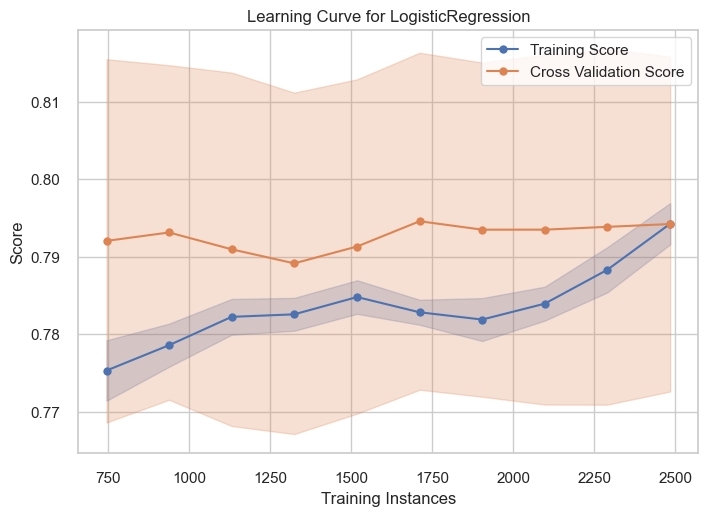

In [ ]:
# from pycaret.classification import plot_model

# # Plot learning curve untuk model regresi
# # gbr adalah objek model yang telah dilatih
# plot_model(finalmodel, plot='learning')


The learning curve provided for Logistic Regression offers valuable insights into the model's performance as more data is used for training:

- Convergence of Training and Validation Scores: Both the training and cross-validation scores are converging as the number of training instances increases. This is a good sign, indicating that adding more data is unlikely to result in significant improvements in the model's ability to generalize. The model is stabilizing and is not overfitting as the cross-validation score is not decreasing, which is positive.

- Gap Between Training and Cross-Validation Scores: There is a consistent gap between the training and cross-validation scores. This gap indicates a slight variance error, which means the model is fitting the training data slightly better than it is generalizing to unseen data. However, the gap is relatively small, which suggests the model has a good balance between bias and variance.

- Score Plateau: The scores for both training and cross-validation are plateauing. It suggests that the model might have reached its performance limit with the given features and hyperparameters. Further gains might require feature engineering, collecting more features, or trying more complex models.

- Score Improvement Opportunity: The cross-validation score appears to be slightly increasing with more data, especially from 2000 training instances onwards. It could mean the model would still benefit from more data, or perhaps the variance within the data is such that certain ranges of data provide better learning opportunities for the model.

- Training Score Higher than Cross-Validation: This is typically the case for most models, as they tend to perform better on data they have seen. However, since the scores are quite close, it suggests the model is generalizing well.

- Possible Overfitting: If the training score continues to be higher and the cross-validation score starts to decrease with more data, it would indicate overfitting. But since this is not observed here, the model seems to be well-tuned for the current dataset size.

In summary, the learning curve indicates a well-performing Logistic Regression model for the given dataset. To potentially improve the model, you could experiment with additional feature engineering, hyperparameter tuning, or consider ensemble methods that might capture more complex patterns in the data.

In [ ]:
# # Setup the classification environment
# clf1 = setup(data, target=finalmodel, session_id=123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(3944, 11)"
4,Transformed data shape,"(3944, 17)"
5,Transformed train set shape,"(2760, 17)"
6,Transformed test set shape,"(1184, 17)"
7,Ordinal features,2
8,Numeric features,4
9,Categorical features,6


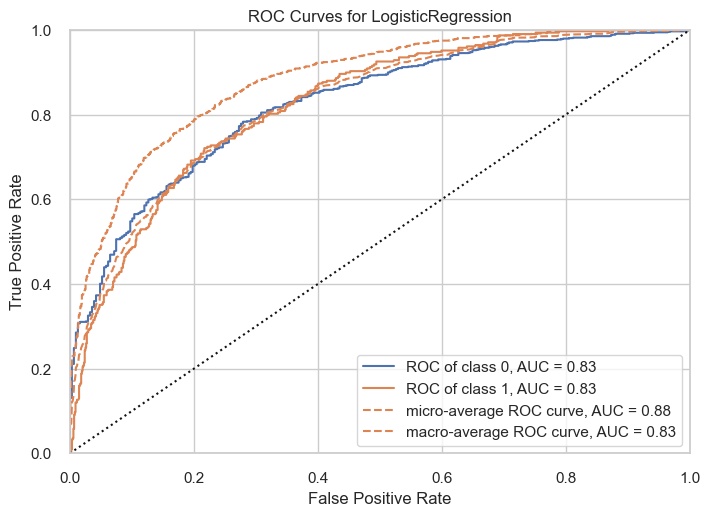

In [ ]:
# # ROC Curve
# plot_model(finalmodel, plot = 'auc')

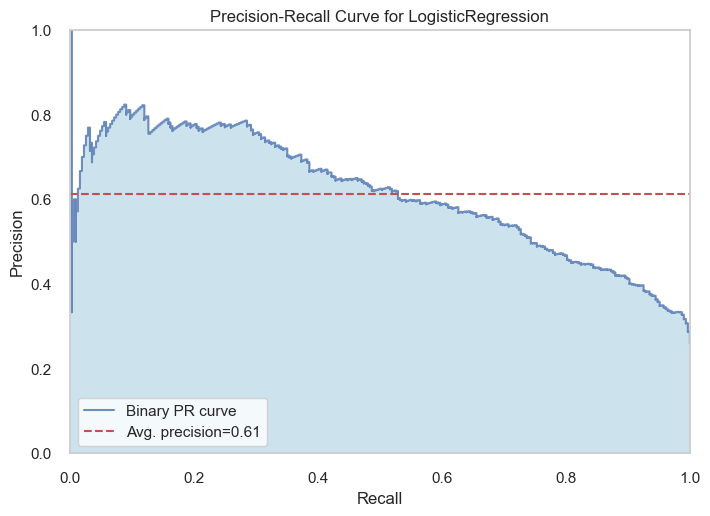

In [ ]:
# # Precision-Recall Curve
# plot_model(finalmodel, plot = 'pr')

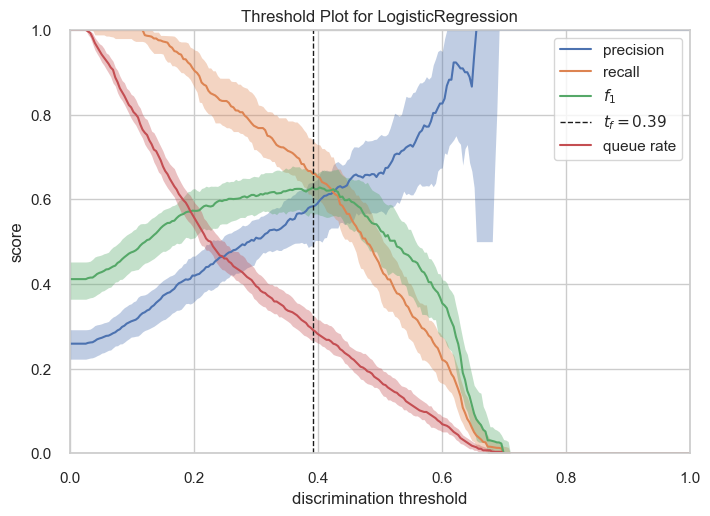

In [ ]:
# Discriminant Threshold
plot_model(finalmodel, plot = 'threshold')

## Time Complexity

In [ ]:
import time

# Menghitung waktu yang diperlukan untuk melatih model
start_time = time.time()
# gbr adalah objek model yang telah dilatih
tuned_lr = create_model(finalmodel)
end_time = time.time()
time_taken = end_time - start_time
print(f"Waktu yang diperlukan untuk melatih model Tuned Logistic Regression: {time_taken} detik")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:02:29
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7971,0.8411,0.3944,0.6829,0.5000,0.3840,0.4068
1,0.7899,0.8295,0.5634,0.5970,0.5797,0.4398,0.4401
2,0.7645,0.8305,0.3803,0.5625,0.4538,0.3107,0.3204
3,0.8007,0.8092,0.4722,0.6667,0.5528,0.4294,0.4400
4,0.8007,0.8083,0.5000,0.6545,0.5669,0.4405,0.4473
5,0.7862,0.8358,0.3750,0.6585,0.4779,0.3560,0.3783
6,0.7862,0.8386,0.3472,0.6757,0.4587,0.3422,0.3717
7,0.7609,0.8360,0.4028,0.5577,0.4677,0.3187,0.3257
8,0.8188,0.8495,0.4861,0.7292,0.5833,0.4734,0.4893


Waktu yang diperlukan untuk melatih model Tuned Logistic Regression: 0.8972790241241455 detik
